## Intro to IMHOTEP
Notebook to illustrate how to load data from the IMHOTEP dataset and plot MAPS of a given timestep.

#### Import modules

In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature

import cmocean

import pkg_resources


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li
from libimhotep import pltscripts as pltGLO

plt.rcParams.update({'hatch.color': '#086A87'})

# for jupyter notebook display
%matplotlib inline

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
Name: libimhotep.pltscripts
Package: libimhotep
This is a collection of  basic scripts to plot the different GLOBAL plots with my favourite settings.


* Parameters

In [2]:
# EGAI.001: this is experiment EGAI member #1 of the ensemble simulation
nexp = "EGAI.001"

prefix = "eORCA025.L75-IMHOTEP"

# frequency of the input files
fo="1y"

# name of the variable
varnasss = 'sosaline'

# period over which to read
y1='1980'
y2='2018'

* Where are the input files? (input directory)

In [3]:
# path for data (experiments)
diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)

diridat

'/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/'

* Where are the input files (list of files with full path)

In [4]:
filelist = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf")
filelist

'/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.001*gridTsurf.nc'

* load data :

In [5]:
data = xr.open_mfdataset(filelist,decode_times=True)[varnasss].sel(time_counter=slice(y1,y2))
data

<xarray.DataArray 'sosaline' (time_counter: 39, y: 1207, x: 1442)>
dask.array<concatenate, shape=(39, 1207, 1442), dtype=float32, chunksize=(1, 1207, 1442), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x
Attributes:
    units:             1e-3
    valid_min:         0.0
    valid_max:         0.0
    long_name:         sea surface salinity
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           366

In [8]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

## select data to plot (at one given timestep)

In [11]:
data2plot = data.isel(time_counter=10)
data2plot

<xarray.DataArray 'sosaline' (y: 1207, x: 1442)>
dask.array<getitem, shape=(1207, 1442), dtype=float32, chunksize=(1207, 1442), chunktype=numpy.ndarray>
Coordinates:
    time_counter  datetime64[ns] 1990-07-02T12:00:00
Dimensions without coordinates: y, x
Attributes:
    units:             1e-3
    valid_min:         0.0
    valid_max:         0.0
    long_name:         sea surface salinity
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           366

In [ ]:
# Quickest way to plot a map (as an image, without g

In [ ]:
data2plot.plot()

* prepare data to plot by masking land grid cells

In [10]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)


* simplest map on geographical projection :

In [ ]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap([21, 39, 0.5],cm_base='viridis',cu='k',co='w') 

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR A GLOBAL MAP
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)

#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD


#========= REMOVE FRAME 
li.Fnospines(ax)
 
plt.show()

_Note: The interpolation of the variable also fills continents in a weird way,  and obviously you don't want this. Solution: you can fill in plain color the contients. See just below:_

* map on geographical projection and add geographical features:

In [ ]:
# first define some  default color parameters 
pltcolparam = li.Fpltsetcolorsdefaults('TM')
pltcolparam['levbounds']= lev
pltcolparam['cbincr']= cbincr

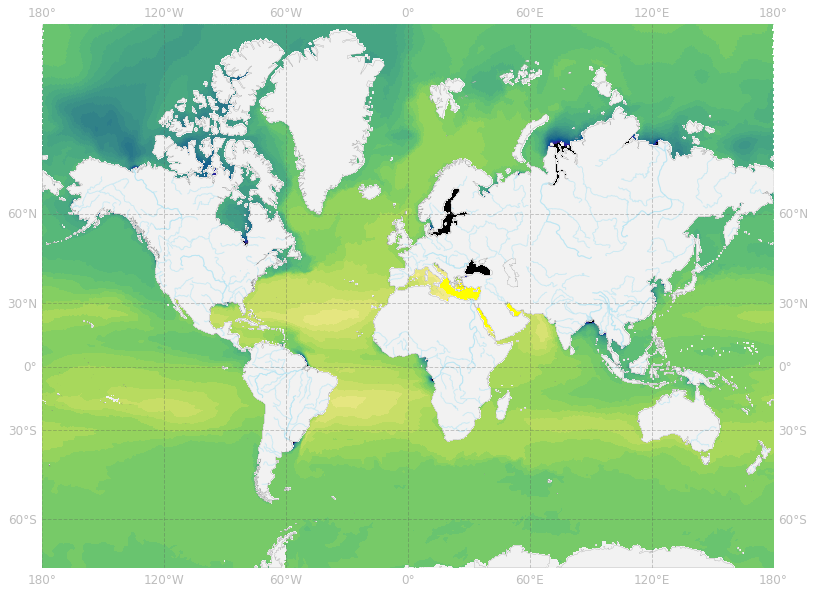

In [52]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

## Here we deal with GLOBAL or REGIONAL map over predefined regions:

* Example: GLOBAL map:

In [53]:
    # user's parameters:
    # levels over which to plot the ocean variable [min, max, increment values]
    lev = [21, 39, 0.5]
    
    # predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
    # 'GLO' for global plot
    reg='GLO'
    
    
    #set default grid parameters before plotting
    pltgridparam = li.Fpltgridparamdefaults(reg=reg)
    print('- gridparam')
    print(gridparam)

    # set default color parameters before plotting
    pltcolparam = li.Fpltsetcolorsdefaults('TM')
    if (lev=='def'):
        pass
    else:
        pltcolparam['levbounds']= lev
    if (cbincr=='def'):
        pass
    else:
        pltcolparam['cbincr']= cbincr


- gridparam
{'reg': 'ind', 'gridl': False, 'incrgridlon': 45, 'incrgridlat': 30, 'sath': 35785831, 'minlat': -21, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': 90, 'latcentr': 0, 'axextent': [30, 130, -21, 35]}


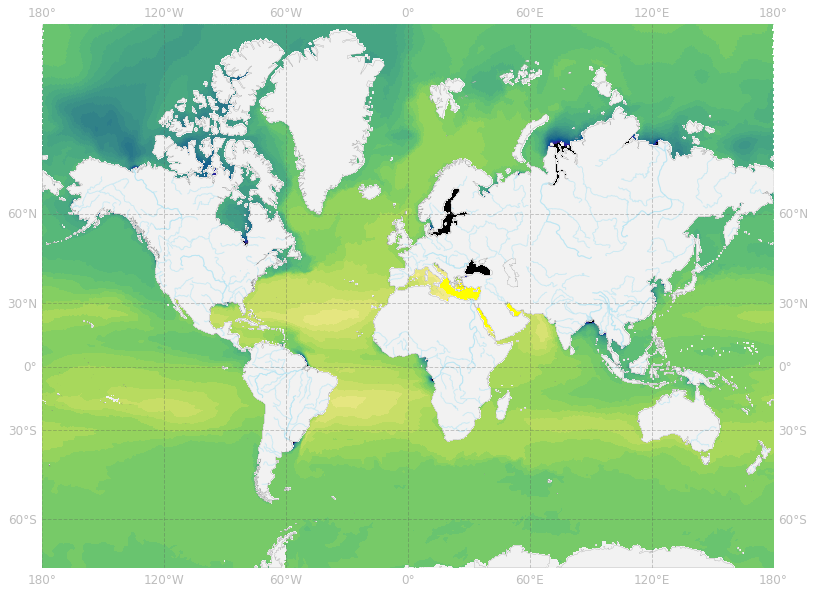

In [54]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)


        
plt.show()

* Other example: ATLANTIC map

In [55]:
    # user's parameters:
    # levels over which to plot the ocean variable [min, max, increment values]
    lev = [21, 39, 0.5]
    
    # predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
    # 'GLO' for global plot
    reg='atl'
    
    
    #set default grid parameters before plotting
    pltgridparam = li.Fpltgridparamdefaults(reg=reg)
    print('- gridparam')
    print(gridparam)

    # set default color parameters before plotting
    pltcolparam = li.Fpltsetcolorsdefaults('TM')
    if (lev=='def'):
        pass
    else:
        pltcolparam['levbounds']= lev
    if (cbincr=='def'):
        pass
    else:
        pltcolparam['cbincr']= cbincr


- gridparam
{'reg': 'ind', 'gridl': False, 'incrgridlon': 45, 'incrgridlat': 30, 'sath': 35785831, 'minlat': -21, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': 90, 'latcentr': 0, 'axextent': [30, 130, -21, 35]}


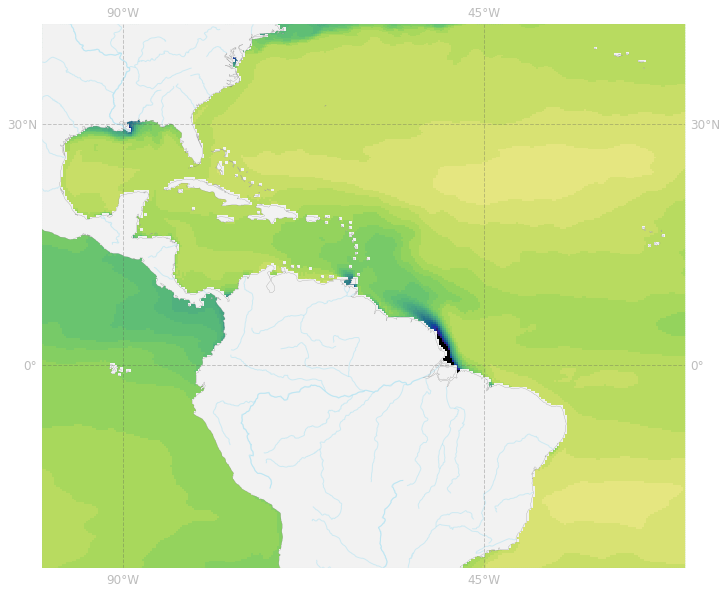

In [56]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)


        
plt.show()

* Other example: if you want to define your own subregion:

In [65]:
    # user's parameters:
    # levels over which to plot the ocean variable [min, max, increment values]
    lev = [21, 39, 0.5]
    
    # predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
    # 'GLO' for global plot
    reg='atl'
    
    
    #set default grid parameters before plotting
    pltgridparam = li.Fpltgridparamdefaults(reg=reg)
    pltgridparam['axextent']=[-100,20,-11,41]
    pltgridparam['minlat']=pltgridparam['axextent'][2]
    pltgridparam['minlat']=pltgridparam['axextent'][3]
    print('- pltgridparam')
    print(pltgridparam)

    # set default color parameters before plotting
    pltcolparam = li.Fpltsetcolorsdefaults('TM')
    if (lev=='def'):
        pass
    else:
        pltcolparam['levbounds']= lev
    if (cbincr=='def'):
        pass
    else:
        pltcolparam['cbincr']= cbincr


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 45, 'incrgridlat': 30, 'sath': 35785831, 'minlat': 41, 'maxlat': 35.0, 'minlon': -100, 'maxlon': -20, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, 20, -11, 41]}


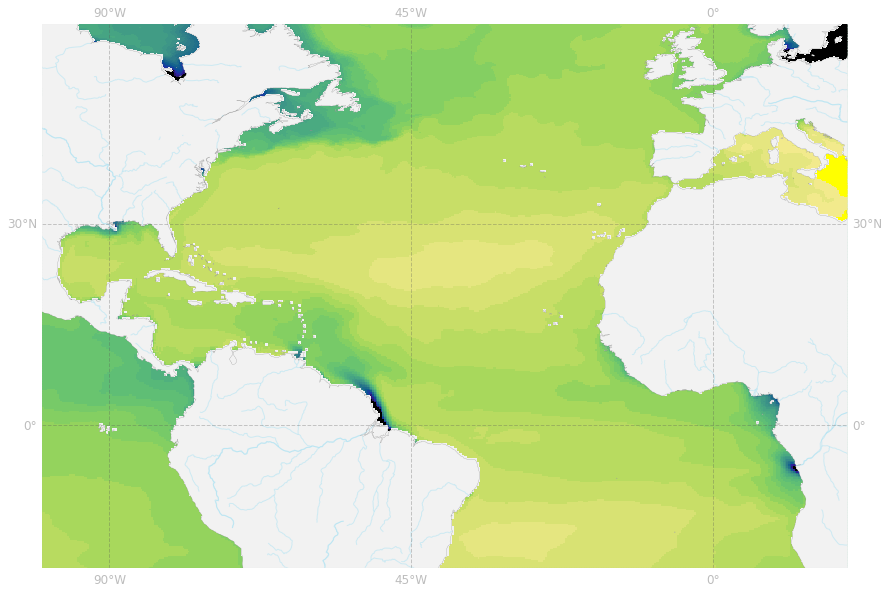

In [64]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)


        
plt.show()